# <center>Machine Learning Lab: Exercise Sheet 6</center>
<center> <b>Submitted By: Mohit Bansal</b></center>
<center> <b>Student ID: 279314</b></center>

You are required to pre-process given datasets:
+ **Generate a Sample dataset called D1 :**
    + Initialize matrix x ∈ R100×1 using Uniform distribution with μ = 1 and σ = 0.05 
    + Generate target y ∈ R100×1 using y = 1.3x2 + 4.8x + 8 + ψ, where ψ ∈ R100×1 randomly initialized.
+ **Wine Quality called D2:**
    + Use winequality-red.csv http://archive.ics.uci.edu/ml/datasets/Wine+Quality
    
## Load the redwine data using pandas

In [302]:
# Import Libraries
%pylab inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import math
from numpy import random
import warnings

warnings.filterwarnings('ignore')
np.seterr(all='ignore')
path = '/Users/mundanemohit/Google Drive/My Work/MSc. Data Analytics/WiSe 18/3113 Machine Learning Lab/Excercises/Ex3'
os.chdir(path)

# Read Datasets
redwineDF = pd.read_csv('winequality-red.csv', sep = ';')
whitewineDF = pd.read_csv('winequality-white.csv', sep = ';')

Populating the interactive namespace from numpy and matplotlib


In [303]:
redwineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Create Dataset D1

+ Initialize matrix $x ∈ R^{100×1}$ using Uniform distribution with μ = 1 and σ = 0.05 
+ Generate target $y ∈ R^{100×1}$ using $y = 1.3x^2 + 4.8x + 8 + ψ$, where $ψ ∈ R^{100×1}$ randomly initialized.

In [245]:
X = np.random.normal(loc=1, scale=0.05, size=100)
noise = np.random.randn(100)

y = 1.3 * (X**2) + 4.8 * X + 8 + noise * 0.1
myDF = pd.DataFrame({'X': X, 'y': y})
myDF = myDF.sort_values(by=['X'])
myDF.head()

,X,y
15,0.879690,13.163923
36,0.917702,13.404463
35,0.922096,13.651768
27,0.926825,13.537480
78,0.930866,13.438969


# Exercise 0: Data Preprocessing

+ **0.1: First, let's remove all rows with NA values**
+ **0.2: Normalize numeric columns**
+ **0.3: Finally, we will split the dataset into train & test**

In [4]:
# Remove rows with NA values
redwineDF = redwineDF.dropna()

# Normalize numeric columns for wine datasets
for col in redwineDF.columns:
    redwineDF[col] = (redwineDF[col] -redwineDF[col].min())/(redwineDF[col].max() - redwineDF[col].min())

# Divide data into test & train sets
redwineDF_train= redwineDF.sample(frac=0.8,random_state=200)
redwineDF_test = redwineDF.drop(redwineDF_train.index)
print("Red Wine Dataset ----> Train Set:", len(redwineDF_train), "    Test Set: ", len(redwineDF_test))

redwineDF.head()

Red Wine Dataset ----> Train Set: 1279     Test Set:  320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Exercise 1: Generalized Linear Models with Scikit Learn

In this task you are required to use Scikit Learn to experiment with following linear models and Stochastic Gradient Descent (SGD) [Hint: use SGDRegressor].
1. Ordinary Least Squares 
2. Ridge Regression
3. LASSO

Following are required in this task:

### 1.1. Split your data into Train and Test Splits. Use dataset D2
### 1.2. For each model, 
+ Pick three sets of hyperparameters and learn each model (without cross validation). 
+ Measure Train and Test RMSE and plot it on one plot. 
+ Explain the plots and relate it to the theory studied in lectures i.e. influence of regularized vs nonregularized models. 
+ You have to compare the following models and argument should explain underfitting and overfitting.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Function for calculating RMSE 
def predict(X, y, fitter):
    y_hat = fitter.predict(X)
    return round(np.sqrt(mean_squared_error(y, y_hat)), 4)

# Function for 3D plot
def plotter(x, y, z, z2, title):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(x, y, z, zdir='z')
    ax.scatter(x, y, z2, zdir='z')
    ax.set_xlabel('Log (Learning Rate)')
    ax.set_ylabel('Log (Reg. factor)')
    ax.set_zlabel(title)
    fig.show()

In [309]:
# Initial parameters for learning rate and regularization penalty
param_alpha = [0.00005, 0.05, .5]
param_lambda = [0.00001, 0.001, 1]
a_arr, l_arr = [], [] 
OLS_Train_Err, OLS_Test_Err = [], []
Ridge_Train_Err, Ridge_Test_Err = [], []
LASSO_Train_Err, LASSO_Test_Err = [], []

# Seperate X & y from training set
X = np.matrix(redwineDF_train.loc[:, redwineDF_train.columns != 'quality'])
y = list(redwineDF_train['quality'])
Xtest = redwineDF_test.loc[:, redwineDF_test.columns != 'quality']
ytest = list(redwineDF_test['quality'])

In [310]:
# Iteratively calculate RMSE for train & test set for all 3 methods
for a in param_alpha:
    for l in param_lambda:
        a_arr.append(a)
        l_arr.append(l)
        
        # Create OLS model
        fitter = SGDRegressor(loss="squared_loss", penalty=None,  alpha = 0,
                              learning_rate='constant', eta0 = a)
        fitter.fit(X, y)
        OLS_Train_Err.append(predict(X, y, fitter))
        OLS_Test_Err.append(predict(Xtest, ytest, fitter))

        # Create Ridge Regression model
        fitter = SGDRegressor(loss="squared_loss", penalty='l2', alpha = l,
                              learning_rate='constant', eta0 = a)
        fitter.fit(X, y)
        Ridge_Train_Err.append(predict(X, y, fitter))
        Ridge_Test_Err.append(predict(Xtest, ytest, fitter))

        # Create LASSO Regression model
        fitter = SGDRegressor(loss="squared_loss", penalty='l1', alpha = l,
                              learning_rate='constant', eta0 = a)
        fitter.fit(X, y)
        LASSO_Train_Err.append(predict(X, y, fitter))
        LASSO_Test_Err.append(predict(Xtest, ytest, fitter))

In [311]:
# Collaborate all 3 results        
res_DF = pd.DataFrame(np.column_stack((a_arr,l_arr,
                              OLS_Train_Err, OLS_Test_Err,
                              Ridge_Train_Err, Ridge_Test_Err,
                              LASSO_Train_Err, LASSO_Test_Err)), 
             columns = ['Alpha', 'Lambda', 'OLS_Train', 'OLS_Test', 
                        'Ridge_Train', 'Ridge_Test', 'LASSO_Train',
                        'LASSO_Test'])

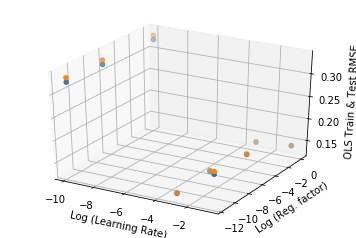

In [27]:
plotter(np.log(a_arr), np.log(l_arr), OLS_Train_Err, OLS_Test_Err, "OLS Train & Test RMSE")

#### We use a logarithmic scale here for better visual representation.
OLS model doesn't use regularization. Therefore, the RMSE for a particular learning should be more or less similar for any value of lambda (given that the model is stable).

Intuitively, we can see that model with a **very low learning rate** (5 x $10^{-5}$) has High RMSE which is probably because it converges early. Also, train & test values do not overlap as in other cases which could mean that there is underfitting here. 

Now, the model with a **high learning rate** (5 x $10^{-1}$) has inconsistent results for the 3 tests which means that it is not optimized properly.

So, learning rate of (5 x $10^{-2}$) yeilds the best and most consistent results.

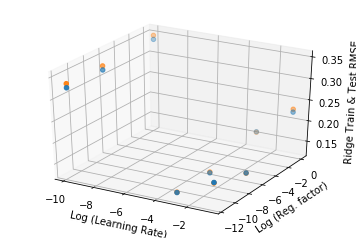

In [28]:
plotter(np.log(a_arr), np.log(l_arr), Ridge_Train_Err, Ridge_Test_Err, "Ridge Train & Test RMSE")

So we've established that learning rate of (5 x $10^{-2}$) yeilds the best results so far. If we look closely, when regularization factor is really high i.e. 1, the RMSE is higher while the effect is not so obvious in the other 2 cases. Therefore, a **high regularization factor** will lead to convergence sooner and a more general/underfit model.

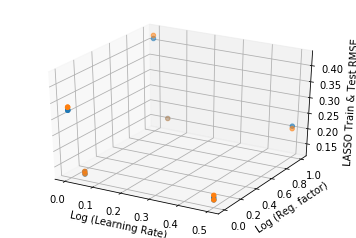

In [29]:
plotter(a_arr, l_arr, LASSO_Train_Err, LASSO_Test_Err, "LASSO Train & Test RMSE")

In LASSO, the effects of regularization are more magnified than Ridge. Using the same regularization factor will make the LASSO model more sensitive than Ridge, possibly because our betas are between 0 and 1 and L2 regression takes the sum of squares meaning an overall smaller regularization term.

In [30]:
res_DF

,Alpha,Lambda,OLS_Train,OLS_Test,Ridge_Train,Ridge_Test,LASSO_Train,LASSO_Test
0,0.00005,0.00001,0.3252,0.3344,0.3252,0.3344,0.3252,0.3344
1,0.00005,0.00100,0.3252,0.3344,0.3252,0.3344,0.3258,0.3350
2,0.00005,1.00000,0.3252,0.3344,0.3384,0.3477,0.4141,0.4240
3,0.05000,0.00001,0.1294,0.1312,0.1317,0.1325,0.1398,0.1406
4,0.05000,0.00100,0.1333,0.1351,0.1297,0.1317,0.1317,0.1329
5,0.05000,1.00000,0.1338,0.1355,0.1605,0.1594,0.1617,0.1610
6,0.50000,0.00001,0.1885,0.1947,0.1735,0.1724,0.1427,0.1499
7,0.50000,0.00100,0.1869,0.1883,0.1470,0.1466,0.1353,0.1355
8,0.50000,1.00000,0.1418,0.1408,0.2241,0.2310,0.2130,0.2047


From the summary table, we can see that the OLS model with learning rate = 5 x $10^{-2}$ gives the best avg. RMSE of ~0.1320 on the test set. Howeverm Ridge regressor with the same learning rate and regularization factor of $10^{-3}$ gives a better RMSE of ~0.1297. Since Train & Test RMSE are comparable in both cases, we can say that the models are not overfitted. 

### 1.3. Now tune the hyperparameters using scikit learn GridSearchCV and plot the results of cross validation for each model. [Hint: use cv results to see different options]

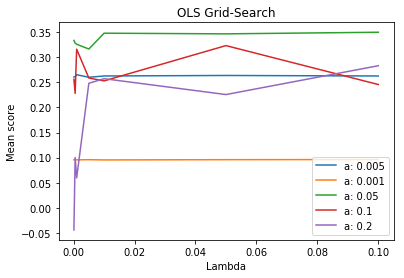

In [313]:
from sklearn.model_selection import GridSearchCV

def grid_plot(model, a, l, title):
    scores = model.cv_results_['mean_train_score']
    scores = np.round(np.array(scores).reshape(len(l), len(a)), 4)
    scores = scores.T
    for ind, i in enumerate(a):
        plt.plot(l, scores[ind], label='a: ' + str(i))
    plt.legend()
    plt.xlabel('Lambda')
    plt.ylabel('Mean score')
    plt.title(title)
    plt.show()

param_alpha = [.005, .001, .05, .1, .2]
param_lambda = [.0001, .0005, .001, .005, .01, .05, .1]
parameters = {'eta0':param_alpha,
              'alpha':param_lambda}

# OLS
estimator = SGDRegressor(loss="squared_loss", penalty=None,  alpha = 0,
                              learning_rate='constant', eta0 = a)
ols = GridSearchCV(estimator, parameters, cv=5)
ols.fit(X, y)
grid_plot(ols, param_alpha, param_lambda, "OLS Grid-Search")

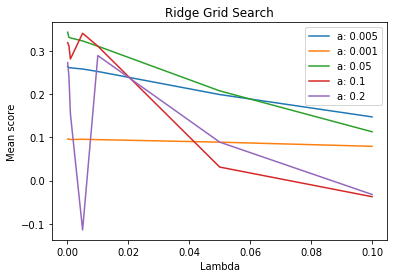

In [315]:
# Ridge
estimator = SGDRegressor(loss="squared_loss", penalty='l2', alpha = l,
                              learning_rate='constant', eta0 = a)
ridge = GridSearchCV(estimator, parameters, cv=5)
ridge.fit(X, y)
grid_plot(ridge, param_alpha, param_lambda, "Ridge Grid Search")

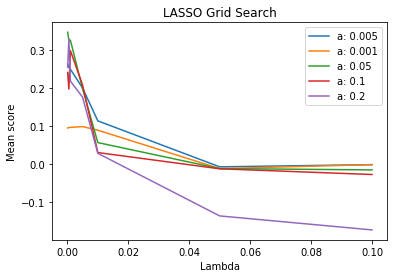

In [316]:
# LASSO
estimator = SGDRegressor(loss="squared_loss", penalty='l1', alpha = l,
                              learning_rate='constant', eta0 = a)
lasso = GridSearchCV(estimator, parameters, cv=5)
lasso.fit(X, y)
grid_plot(lasso, param_alpha, param_lambda, "LASSO Grid Search")

Grid-Search shows us that **learning rate = $10^{-3}$**(orange) gives the best result. Moreover, **regularization factor of 5 x $10^{-2}$** with LASSO performs the best among all 3 models.

### 1.4. Using the optimal hyperparameter you have to evaluate each model using cross val score. Plot each model using boxplot and explain how significant are your results.

In [36]:
from sklearn import cross_validation

print("RMSE for 5-Fold Cross-Validation on Training Set")

# OLS
estimator = SGDRegressor(loss="squared_loss", penalty=None,  alpha = 0,
                              learning_rate='constant', eta0 = 0.001)
scores = cross_validation.cross_val_score(estimator, Xtest, ytest, scoring='mean_squared_error', cv=5)
scoresDF = pd.DataFrame({'OLS': np.round(np.sqrt(-scores), 4)})

# Ridge
estimator = SGDRegressor(loss="squared_loss", penalty='l2', alpha = 0.05,
                         learning_rate='constant', eta0 = 0.001)
scores = cross_validation.cross_val_score(estimator, Xtest, ytest, scoring='mean_squared_error', cv=5)
scoresDF["Ridge"] = np.round(np.sqrt(-scores), 4)

# LASSO
estimator = SGDRegressor(loss="squared_loss", penalty='l1', alpha = 0.05,
                         learning_rate='constant', eta0 = 0.001)
scores = cross_validation.cross_val_score(estimator, X, y, scoring='mean_squared_error', cv=5)
scoresDF["LASSO"] = np.round(np.sqrt(-scores), 4)
scoresDF

RMSE for 5-Fold Cross-Validation on Training Set


,OLS,Ridge,LASSO
0,0.1521,0.1518,0.1498
1,0.1642,0.1651,0.1531
2,0.1803,0.1821,0.1533
3,0.1899,0.1933,0.1761
4,0.1509,0.1519,0.1802


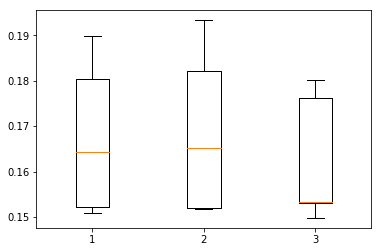

In [37]:
plt.boxplot(scoresDF.T)
plt.show()

**MODEL 3: LASSO** seems to be the best model because of it's low error value and consistency.  

## Exercise 2: Polynomial Regression

+ In this task you are required to use dataset D1. 
+ In this task you have to use more degrees of polynomial feature for your data i.e. degrees 1, 2, 7, 10, 16 and 100. [Hint: use sklearn.preprocessing to generate polynomial features]. Your tasks are:

+ **Task A: Prediction with high degree of polynomials**
    + (a) For each newly created dataset learn LinearRegression.
    + (b) Plot prediction curves for each reprocessed data and (y vs X). Which phenomena you observed for different prediction curves.

X^ 1 MSE:  0.010699964116390258
X^ 2 MSE:  0.010841278068524007
X^ 7 MSE:  0.01588858852893855
X^ 10 MSE:  0.021825466243148024
X^ 16 MSE:  0.0376640540084555
X^ 100 MSE:  0.13429472098822579


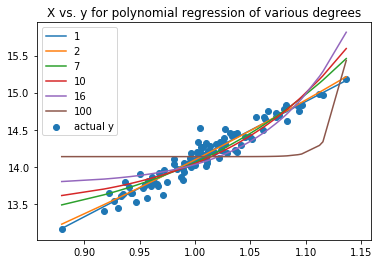

In [300]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Generate polynomial features upto 100 degrees
X = myDF.X.reshape(-1, 1)
y = myDF.y
poly = PolynomialFeatures(100)
XTransform = poly.fit_transform(X).T

# Create linear model
def poly_regr(degree, myDF, XTransform):
    model = linear_model.LinearRegression()
    X = XTransform[degree].reshape(-1,1)         # Predictor
    model.fit(X, y)
    myDF["yhat"] = model.predict(X)
    plt.plot(myDF.X, myDF.yhat)
    print('X^', degree, 'MSE: ', mean_squared_error(myDF.y, myDF.yhat))
    
# Plot results
degree = [1, 2, 7, 10, 16, 100]
plt.scatter(myDF.X, y)
plt.title('X vs. y for polynomial regression of various degrees')

for d in degree:
    poly_regr(d, myDF, XTransform)
plt.legend(degree + ['actual y'])
plt.show()

We can see that as the degree of X increases, the regression line becomes increasingly curved. However, the MSE is minimum for $x^{10}$ at 0.0218. 

+ **Task B: Effect of Regularization**
    + (a) Fixed the degree of polynomial to 10
    + (b) Pick Four values of λ (regularization constant) and learn Ridge Regression [Hint: use Ridge and your λ values should be far a part i.e. 0, $10^{−6},10^{−2}, 1$].
    + (c) Plot prediction curves for each reprocessed data and (y vs x). Which phenomena you observed for different prediction curves.

Reg. Factor:  0  MSE:  0.022130442599964474
Reg. Factor:  1e-06  MSE:  0.021909567808424443
Reg. Factor:  0.01  MSE:  0.021866385297849567
Reg. Factor:  1  MSE:  0.08883802964926907


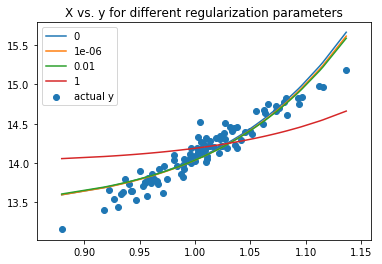

In [301]:
# Set X to X^10
X = XTransform[10].reshape(-1,1)
lamb = [0, 10**-6, 10**-2, 1]

plt.scatter(myDF.X, y)
plt.title('X vs. y for different regularization parameters')

for l in lamb:
    model = SGDRegressor(loss="squared_loss", penalty='l2', 
                         alpha = l, eta0 = 0.3)
    model.fit(X, y)
    myDF["yhat"] = model.predict(X)
    plt.plot(myDF.X, myDF.yhat)
    print('Reg. Factor: ', l, ' MSE: ', mean_squared_error(myDF.y, myDF.yhat))
    
plt.legend(lamb + ['actual y'])
plt.show()

We notice that a very high regularization factor (1 in this case) will lead to the model being underfitted. 

Although the model results are almost similar for the other 3 cases, we notice that the regularized models perform slightly better than the unregularized model.